In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.python.platform import build_info as build
import matplotlib.pyplot as plt
print(f"tensorflow version: {tf.__version__}")
print(f"Cuda Version: {build.build_info['cuda_version']}")
print(f"Cudnn version: {build.build_info['cudnn_version']}")

tensorflow version: 2.10.1
Cuda Version: 64_112
Cudnn version: 64_8


In [2]:
data = pd.read_csv('../data/samples_1v.csv', usecols=['init_stop', 'end_stop', 'linkref', 'date_time_init', 'date_time_end', 'time_travel'])
data['date_time_init'] = pd.to_datetime(data['date_time_init'])
data['date_time_end'] = pd.to_datetime(data['date_time_end'])
data['DayOfWeek'] = data['date_time_init'].dt.weekday
data.set_index('date_time_init', inplace= True)

In [3]:
data

,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek
date_time_init,,,,,,
2023-03-01 07:25:51,0,36,0:36,2023-03-01 07:27:33,102.0,2
2023-03-01 07:27:33,36,37,36:37,2023-03-01 07:29:19,106.0,2
2023-03-01 07:29:19,37,38,37:38,2023-03-01 07:30:49,90.0,2
2023-03-01 07:30:49,38,39,38:39,2023-03-01 07:31:13,24.0,2
2023-03-01 07:31:13,39,40,39:40,2023-03-01 07:32:29,76.0,2
...,...,...,...,...,...,...
2023-03-25 07:51:20,113,114,113:114,2023-03-25 07:51:32,12.0,5
2023-03-25 07:51:32,114,115,114:115,2023-03-25 07:53:02,90.0,5
2023-03-25 07:53:02,115,116,115:116,2023-03-25 07:53:14,12.0,5


Mostrar los 15 datos con viaje de paradero a paradero mas duraderos

In [4]:
max_x=data.nlargest(15, ['time_travel'])
max_x

,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek
date_time_init,,,,,,
2023-03-12 08:57:25,84,85,84:85,2023-03-12 11:55:04,10659.0,6
2023-03-12 09:21:46,109,110,109:110,2023-03-12 12:19:04,10638.0,6
2023-03-12 09:12:00,93,94,93:94,2023-03-12 12:08:26,10586.0,6
2023-03-12 09:04:53,89,90,89:90,2023-03-12 12:00:41,10548.0,6
2023-03-22 08:05:52,36,37,36:37,2023-03-22 10:40:40,9288.0,2
2023-03-12 09:54:19,114,115,114:115,2023-03-12 11:44:46,6627.0,6
2023-03-12 11:44:46,115,116,115:116,2023-03-12 12:22:55,2289.0,6
2023-03-12 09:24:12,113,114,113:114,2023-03-12 09:54:19,1807.0,6
2023-03-20 14:39:25,36,37,36:37,2023-03-20 15:01:00,1295.0,0


Mostrar los 15 datos con viaje de paradero a paradero menos duraderos

In [5]:
min_x=data.nsmallest(15, ['time_travel'])
min_x

,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek
date_time_init,,,,,,
2023-03-12 11:49:25,79,80,79:80,2023-03-12 08:53:30,-10555.0,6
2023-03-12 12:19:34,111,112,111:112,2023-03-12 09:24:00,-10534.0,6
2023-03-12 12:16:32,105,106,105:106,2023-03-12 09:21:06,-10526.0,6
2023-03-12 12:02:40,91,92,91:92,2023-03-12 09:09:26,-10394.0,6
2023-03-12 11:02:03,87,88,87:88,2023-03-12 09:03:47,-7096.0,6
2023-03-12 11:56:29,86,87,86:87,2023-03-12 11:02:03,-3266.0,6
2023-03-01 15:37:38,113,114,113:114,2023-03-01 15:37:43,5.0,2
2023-03-01 07:24:56,113,114,113:114,2023-03-01 07:25:01,5.0,2
2023-03-01 08:18:21,113,114,113:114,2023-03-01 08:18:26,5.0,2


Observacion de los datos del time_travel

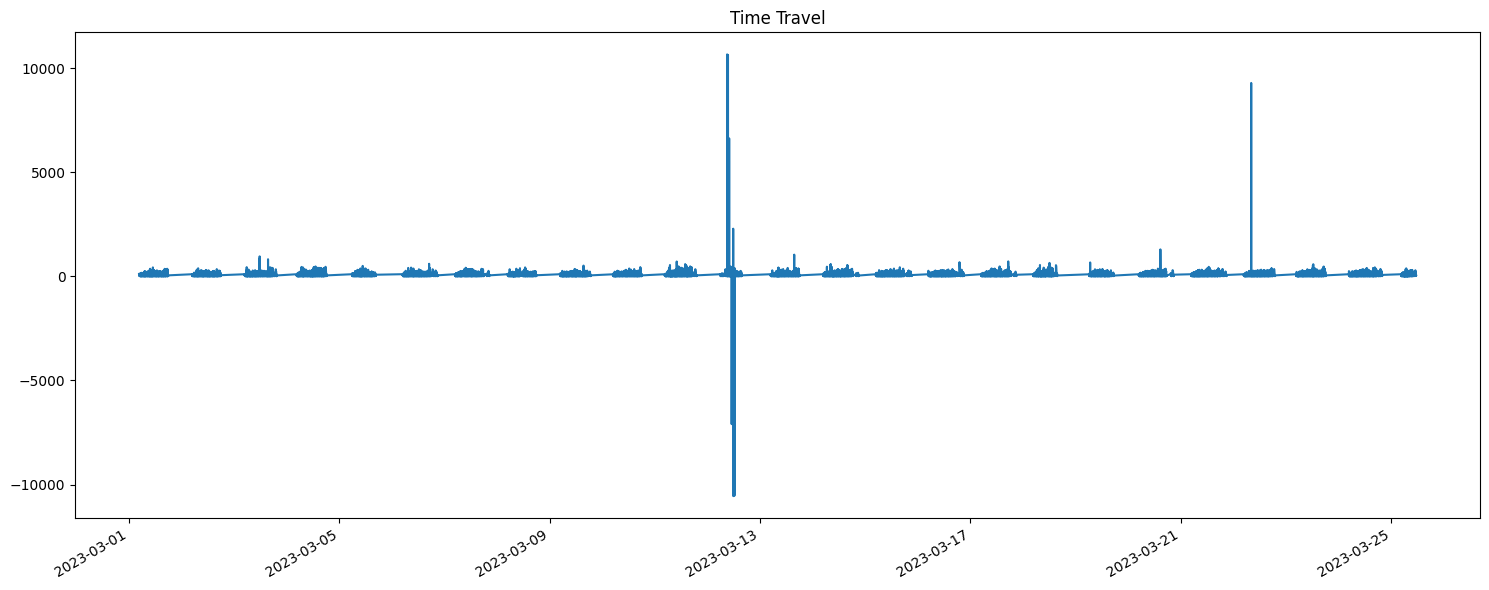

In [105]:
plt.figure(figsize=(15, 6))
data['time_travel'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Time Travel")
plt.tight_layout()
plt.show()

Crear frecuencias de tiempo cada 15 minutos

In [107]:
data.reset_index(inplace=True)
ix = pd.DatetimeIndex(pd.to_datetime(data['date_time_init'])).floor('15min')
data["DateTimeRef"] = ix
data["DowTimeRef"] = pd.to_datetime((data['DayOfWeek'].values - 1) * 24 * 60 * 60 + ix.hour * 60 * 60 + ix.minute * 60, unit = 's')
data

,date_time_init,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek,DateTimeRef,DowTimeRef
0,2023-03-01 07:25:51,0,36,0:36,2023-03-01 07:27:33,102.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
1,2023-03-01 07:27:33,36,37,36:37,2023-03-01 07:29:19,106.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
2,2023-03-01 07:29:19,37,38,37:38,2023-03-01 07:30:49,90.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
3,2023-03-01 07:30:49,38,39,38:39,2023-03-01 07:31:13,24.0,2,2023-03-01 07:30:00,1970-01-02 07:30:00
4,2023-03-01 07:31:13,39,40,39:40,2023-03-01 07:32:29,76.0,2,2023-03-01 07:30:00,1970-01-02 07:30:00
...,...,...,...,...,...,...,...,...,...
212475,2023-03-25 07:51:20,113,114,113:114,2023-03-25 07:51:32,12.0,5,2023-03-25 07:45:00,1970-01-05 07:45:00
212476,2023-03-25 07:51:32,114,115,114:115,2023-03-25 07:53:02,90.0,5,2023-03-25 07:45:00,1970-01-05 07:45:00
212477,2023-03-25 07:53:02,115,116,115:116,2023-03-25 07:53:14,12.0,5,2023-03-25 07:45:00,1970-01-05 07:45:00
212478,2023-03-25 07:53:14,116,117,116:117,2023-03-25 07:53:26,12.0,5,2023-03-25 07:45:00,1970-01-05 07:45:00


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212480 entries, 0 to 212479
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date_time_init  212480 non-null  datetime64[ns]
 1   init_stop       212480 non-null  int64         
 2   end_stop        212480 non-null  int64         
 3   linkref         212480 non-null  object        
 4   date_time_end   212480 non-null  datetime64[ns]
 5   time_travel     212480 non-null  float64       
 6   DayOfWeek       212480 non-null  int64         
 7   DateTimeRef     212480 non-null  datetime64[ns]
 8   DowTimeRef      212480 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(3), object(1)
memory usage: 14.6+ MB


Filtrar datos por paradero

In [109]:
data_filtrado = data[data['linkref'] == '0:36']
data_filtrado

,date_time_init,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek,DateTimeRef,DowTimeRef
0,2023-03-01 07:25:51,0,36,0:36,2023-03-01 07:27:33,102.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
83,2023-03-01 10:34:33,0,36,0:36,2023-03-01 10:35:55,82.0,2,2023-03-01 10:30:00,1970-01-02 10:30:00
166,2023-03-01 14:02:05,0,36,0:36,2023-03-01 14:04:13,128.0,2,2023-03-01 14:00:00,1970-01-02 14:00:00
249,2023-03-01 06:37:35,0,36,0:36,2023-03-01 06:39:17,102.0,2,2023-03-01 06:30:00,1970-01-02 06:30:00
332,2023-03-01 09:31:18,0,36,0:36,2023-03-01 09:32:15,57.0,2,2023-03-01 09:30:00,1970-01-02 09:30:00
...,...,...,...,...,...,...,...,...,...
212065,2023-03-25 07:07:53,0,36,0:36,2023-03-25 07:09:13,80.0,5,2023-03-25 07:00:00,1970-01-05 07:00:00
212148,2023-03-25 06:16:20,0,36,0:36,2023-03-25 06:18:02,102.0,5,2023-03-25 06:15:00,1970-01-05 06:15:00
212231,2023-03-25 06:21:51,0,36,0:36,2023-03-25 06:23:33,102.0,5,2023-03-25 06:15:00,1970-01-05 06:15:00
212314,2023-03-25 07:01:28,0,36,0:36,2023-03-25 07:03:10,102.0,5,2023-03-25 07:00:00,1970-01-05 07:00:00


In [110]:
bootstrap_size_pct = 0.75
test_window_pct = 0.05
n = len(data)
i=1

# Devide into test and train
data_train = data[:int((bootstrap_size_pct + i * test_window_pct) * n)]
data_test = data[int((bootstrap_size_pct + i * test_window_pct) * n):int((bootstrap_size_pct + (i + 1) * test_window_pct) * n)]

In [111]:
data_train

,date_time_init,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek,DateTimeRef,DowTimeRef
0,2023-03-01 07:25:51,0,36,0:36,2023-03-01 07:27:33,102.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
1,2023-03-01 07:27:33,36,37,36:37,2023-03-01 07:29:19,106.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
2,2023-03-01 07:29:19,37,38,37:38,2023-03-01 07:30:49,90.0,2,2023-03-01 07:15:00,1970-01-02 07:15:00
3,2023-03-01 07:30:49,38,39,38:39,2023-03-01 07:31:13,24.0,2,2023-03-01 07:30:00,1970-01-02 07:30:00
4,2023-03-01 07:31:13,39,40,39:40,2023-03-01 07:32:29,76.0,2,2023-03-01 07:30:00,1970-01-02 07:30:00
...,...,...,...,...,...,...,...,...,...
169979,2023-03-21 13:24:03,113,114,113:114,2023-03-21 13:24:16,13.0,1,2023-03-21 13:15:00,1970-01-01 13:15:00
169980,2023-03-21 13:24:16,114,115,114:115,2023-03-21 13:25:03,47.0,1,2023-03-21 13:15:00,1970-01-01 13:15:00
169981,2023-03-21 13:25:03,115,116,115:116,2023-03-21 13:25:22,19.0,1,2023-03-21 13:15:00,1970-01-01 13:15:00
169982,2023-03-21 13:25:22,116,117,116:117,2023-03-21 13:25:35,13.0,1,2023-03-21 13:15:00,1970-01-01 13:15:00


In [112]:
data_test

,date_time_init,init_stop,end_stop,linkref,date_time_end,time_travel,DayOfWeek,DateTimeRef,DowTimeRef
169984,2023-03-21 15:16:13,0,36,0:36,2023-03-21 15:17:55,102.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
169985,2023-03-21 15:17:55,36,37,36:37,2023-03-21 15:19:26,91.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
169986,2023-03-21 15:19:26,37,38,37:38,2023-03-21 15:21:13,107.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
169987,2023-03-21 15:21:13,38,39,38:39,2023-03-21 15:21:59,46.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
169988,2023-03-21 15:21:59,39,40,39:40,2023-03-21 15:23:04,65.0,1,2023-03-21 15:15:00,1970-01-01 15:15:00
...,...,...,...,...,...,...,...,...,...
180603,2023-03-22 15:09:30,113,114,113:114,2023-03-22 15:09:40,10.0,2,2023-03-22 15:00:00,1970-01-02 15:00:00
180604,2023-03-22 15:09:40,114,115,114:115,2023-03-22 15:10:16,36.0,2,2023-03-22 15:00:00,1970-01-02 15:00:00
180605,2023-03-22 15:10:16,115,116,115:116,2023-03-22 15:10:52,36.0,2,2023-03-22 15:00:00,1970-01-02 15:00:00
180606,2023-03-22 15:10:52,116,117,116:117,2023-03-22 15:11:04,12.0,2,2023-03-22 15:00:00,1970-01-02 15:00:00


In [114]:
import datetime
def info(msg):
    print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " " + msg)

n_train = len(data_train)
n_test = len(data_test)
info('- Train size : {:>8} ({:.2f}%) '.format(n_train, 1. * n_train / n))
info('- Test size  : {:>8} ({:.2f}%) '.format(n_test, 1. * n_test / n))

2023-04-17 16:02:51 - Train size :   169984 (0.80%) 
2023-04-17 16:02:51 - Test size  :    10624 (0.05%) 


# Pruebas con un modelo LSTM

In [115]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# leer el archivo csv
data = pd.read_csv('samples_1v.csv', usecols=['init_stop', 'end_stop', 'linkref', 'date_time_init', 'date_time_end', 'time_travel'])

# convertir la columna date_time_init a datetime
data['date_time_init'] = pd.to_datetime(data['date_time_init'])

# agrupar los datos por enlace y hora de salida para obtener una secuencia de tiempo
grouped_data = data.groupby(['linkref', pd.Grouper(key='date_time_init', freq='H')])['time_travel'].mean().reset_index()

# dividir los datos en entrenamiento y prueba
train_size = int(len(grouped_data) * 0.8)
train_data, test_data = grouped_data[:train_size], grouped_data[train_size:]

# normalizar los datos de entrada
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_norm = scaler.fit_transform(train_data[['time_travel']])
test_data_norm = scaler.transform(test_data[['time_travel']])

# función para crear secuencias de tiempo
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length)])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# crear secuencias de tiempo para los datos de entrenamiento y prueba
seq_length = 24
X_train, y_train = create_sequences(train_data_norm, seq_length)
X_test, y_test = create_sequences(test_data_norm, seq_length)

# construir el modelo LSTM
model = Sequential()
model.add(CuDNNLSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# hacer predicciones para los datos de prueba
y_pred = model.predict(X_test)


Epoch 1/50
675/675 [==============================] - 9s 6ms/step - loss: 8.4706e-04 - val_loss: 5.6862e-04
Epoch 2/50
675/675 [==============================] - 4s 6ms/step - loss: 7.1055e-05 - val_loss: 5.4156e-04
Epoch 3/50
675/675 [==============================] - 4s 6ms/step - loss: 7.1314e-05 - val_loss: 5.4550e-04
Epoch 4/50
675/675 [==============================] - 4s 6ms/step - loss: 7.3620e-05 - val_loss: 5.6109e-04
Epoch 5/50
675/675 [==============================] - 4s 6ms/step - loss: 7.2972e-05 - val_loss: 5.6008e-04
Epoch 6/50
675/675 [==============================] - 4s 6ms/step - loss: 7.1149e-05 - val_loss: 5.3361e-04
Epoch 7/50
675/675 [==============================] - 4s 6ms/step - loss: 7.6613e-05 - val_loss: 5.5283e-04
Epoch 8/50
675/675 [==============================] - 4s 6ms/step - loss: 7.4783e-05 - val_loss: 5.3918e-04
Epoch 9/50
675/675 [==============================] - 4s 6ms/step - loss: 7.1675e-05 - val_loss: 5.5424e-04
Epoch 10/50
675/675 [=======

In [39]:
len(X_train), len(y_train)

(21596, 21596)

In [40]:
len(X_test), len(y_test)

(5381, 5381)

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.0005314730609634774
Root Mean Squared Error: 0.02305369950709598


In [41]:
y_test

array([[0.35872024],
       [0.36338739],
       [0.36677339],
       ...,
       [0.36176789],
       [0.36427746],
       [0.36371261]])

In [38]:
# desnormalizar la salida
y_pred_desnormalized = scaler.inverse_transform(y_pred)

# imprimir la predicción
print(y_pred_desnormalized)

[[44.765656]
 [41.63561 ]
 [41.741196]
 ...
 [35.941006]
 [35.34355 ]
 [36.01339 ]]


In [31]:
# definir el momento de inicio del viaje
date_time_init = '2023-04-11 12:00:00'

# definir las paradas de origen y destino
init_stop = '0'
end_stop = '36'

# obtener los datos correspondientes a las paradas y el momento seleccionados
selected_data = data[(data['init_stop'] == init_stop) & (data['end_stop'] == end_stop) & (data['date_time_init'] >= date_time_init)]
selected_data = selected_data.head(seq_length)  # asegurarse de tener suficientes registros para construir una secuencia

# normalizar los datos
selected_data_norm = scaler.transform(selected_data[['time_travel']])

# crear la secuencia de tiempo
X_new, y_new = create_sequences(selected_data_norm, seq_length)

# hacer la predicción
y_pred_new = model.predict(X_new)

# desnormalizar la predicción
y_pred_new = scaler.inverse_transform(y_pred_new)

# imprimir la predicción
print('El tiempo de viaje estimado entre', init_stop, 'y', end_stop, 'a las', date_time_init, 'es:', y_pred_new[0][0], 'minutos.')

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [36]:
# Crear un nuevo conjunto de datos para hacer una predicción
new_data = pd.DataFrame({
    'init_stop': ['0'],
    'end_stop': ['36'],
    'date_time_init': ['2022-05-15 09:00:00']
})

# Convertir la columna date_time_init a datetime
new_data['date_time_init'] = pd.to_datetime(new_data['date_time_init'])

# Unir el nuevo conjunto de datos con el conjunto de datos original para obtener el linkref correspondiente
new_data = pd.merge(new_data, data[['init_stop', 'end_stop', 'date_time_init', 'linkref']], on=['init_stop', 'end_stop', 'date_time_init'], how='inner')

# Crear una secuencia de tiempo para el nuevo conjunto de datos
new_seq, _ = create_sequences(scaler.transform(new_data[['time_travel']]), seq_length)

# Hacer una predicción en el nuevo conjunto de datos normalizado
new_pred_norm = model.predict(new_seq)

# Desnormalizar la salida de la predicción
new_pred = scaler.inverse_transform(new_pred_norm)

# Mostrar la salida final de la predicción
print('La predicción de time_travel es:', new_pred[0][0])

KeyError: "None of [Index(['time_travel'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd

# crear el DataFrame con el dato nuevo
new_data = pd.DataFrame({
    'init_stop': [36],
    'end_stop': [37],
    'date_time_init': ['2023-04-15 08:00:00'],
    'time_travel': [0.0],
    'init_idp': [None],
    'end_idp': [None],
    'veh': [None],
    'lap': [None],
    'date': [None]
})
# convertir la columna 'date_time_init' a datetime
new_data['date_time_init'] = pd.to_datetime(new_data['date_time_init'])

# extraer características de fecha y hora
new_data['year'] = new_data['date_time_init'].dt.year
new_data['month'] = new_data['date_time_init'].dt.month
new_data['day'] = new_data['date_time_init'].dt.day
new_data['hour'] = new_data['date_time_init'].dt.hour
new_data['minute'] = new_data['date_time_init'].dt.minute

# normalizar los datos numéricos
new_data[num_cols] = scaler.transform(new_data[num_cols])

In [ ]:
# obtener las características relevantes para la predicción
new_X = new_data[relevant_cols]

# convertir los datos a un tensor de numpy
new_X = np.array(new_X)

# ajustar la forma del tensor a la requerida por el modelo LSTM
new_X = new_X.reshape((1, new_X.shape[0], new_X.shape[1]))

# hacer la predicción
y_pred = model.predict(new_X)

# invertir la normalización de la predicción
y_pred_inv = scaler_y.inverse_transform(y_pred)

# imprimir el resultado de la predicción
print('La hora de llegada estimada al paradero 37 es:', y_pred_inv[0][0])

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# cargar los datos
data = pd.read_csv('samples_1v.csv', usecols=['init_stop', 'end_stop', 'linkref', 'time_travel'])

# separar la columna de tiempo de llegada como la variable objetivo
target_col = 'time_travel'
y = data[target_col].values

# eliminar las columnas de fecha y hora del conjunto de datos
data = data.drop(['date_time_init', 'date_time_end'], axis=1)

# eliminar las filas con valores faltantes
data = data.dropna()

# normalizar los datos de entrada
scaler = MinMaxScaler()
X = scaler.fit_transform(data.values)

# dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# definir el modelo LSTM
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# entrenar el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=1)

# hacer predicciones para los datos de prueba
y_pred = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

# calcular las métricas de evaluación en el conjunto de prueba
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# imprimir las métricas de evaluación
print('r2 score: {:.4f}'.format(r2))
print('mse: {:.4f}'.format(mse))
print('mae: {:.4f}'.format(mae))

KeyError: "['date_time_init', 'date_time_end'] not found in axis"

# Pruebas 2 LSTM

Importar las librerías necesarias:

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM, Dropout

Cargar los datos y convertir las fechas en formato datetime:

In [105]:
#Leer datos necesarios
data = pd.read_csv('samples_1v.csv', usecols=['init_stop', 'end_stop', 'linkref', 'date_time_init', 'date_time_end', 'time_travel'], parse_dates=['date_time_init', 'date_time_end'])
len(data)

212480

In [106]:
# Separar los datos en entrenamiento y prueba
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]
print('Datos de entrenamiento: ',len(train_data),'\nDatos de test: ',len(test_data),'\nTotal de datos: ',len(train_data)+len(test_data))

Datos de entrenamiento:  169984 
Datos de test:  42496 
Total de datos:  212480


Normalizar datos

In [107]:
# Normalizar los datos
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['init_stop', 'end_stop', 'time_travel']])
test_scaled = scaler.transform(test_data[['init_stop', 'end_stop', 'time_travel']])

Separar conjunto de datos (entrenamiento y prueba)

In [108]:
# Crear conjuntos de datos de entrenamiento y prueba
X_train = []
y_train = []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, :])
    y_train.append(train_scaled[i, 2])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_scaled)):
    X_test.append(test_scaled[i-60:i, :])
    y_test.append(test_scaled[i, 2])
X_test, y_test = np.array(X_test), np.array(y_test)

Crear modelo CuDNNLSTM

In [121]:
# Crear el modelo LSTM
model = Sequential()
model.add(CuDNNLSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

Entrenar modelo

In [118]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
5311/5311 [==============================] - 40s 7ms/step - loss: 3.7693e-04 - val_loss: 9.1060e-06
Epoch 2/50
5311/5311 [==============================] - 38s 7ms/step - loss: 2.1775e-05 - val_loss: 8.6868e-06
Epoch 3/50
5311/5311 [==============================] - 37s 7ms/step - loss: 2.0682e-05 - val_loss: 1.0340e-05
Epoch 4/50
5311/5311 [==============================] - 38s 7ms/step - loss: 2.0114e-05 - val_loss: 8.5357e-06
Epoch 5/50
5311/5311 [==============================] - 36s 7ms/step - loss: 1.9700e-05 - val_loss: 8.7471e-06
Epoch 6/50
5311/5311 [==============================] - 37s 7ms/step - loss: 1.9235e-05 - val_loss: 8.5064e-06
Epoch 7/50
5311/5311 [==============================] - 37s 7ms/step - loss: 1.9100e-05 - val_loss: 8.9141e-06
Epoch 8/50
5311/5311 [==============================] - 37s 7ms/step - loss: 1.8872e-05 - val_loss: 8.6108e-06
Epoch 9/50
5311/5311 [==============================] - 37s 7ms/step - loss: 1.8811e-05 - val_loss: 8.5371e-06
E

In [103]:
from datetime import timedelta

# Convertir los tiempos predichos a segundos y luego a enteros
y_pred_sec = y_pred.astype(int)

# Crear una lista de objetos timedelta
y_pred_timedelta = [timedelta(seconds=int(x)) for x in y_pred_sec]

# Imprimir los primeros 10 valores
print(y_pred_timedelta[0])

0:00:54
